# Import Required Libraries and Data


In [ ]:
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

#pandas
import pandas as pd

#numpy
import numpy as np

#sklearn 
!pip install sklearn
from sklearn.metrics import classification_report,confusion_matrix,auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import precision_score, roc_auc_score, roc_curve

#XGboost
!pip install xgboost==1.2.0
import xgboost
import xgboost.compat


#matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#SHAP & Other
!pip install shap

from scipy.stats import uniform, randint
import pickle
from scipy import stats
import shap
import time
import pickle


In [196]:
data = pd.read_csv('/content/sample_data/UCI Credit Card Ready.csv')
X = data.drop("Default_Target",axis=1)
y = data.Default_Target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42,shuffle=True)

# Model Training and Evaluation

In [ ]:
#Here is the code used to train the XGboost model, which is commented as we are using a saved pre-trained model

{

# xg_boost = xgb.XGBClassifier(objective="binary:logistic",eval_metric="auc")

# def train_model(model,train_data, train_target):
#     print("Training the model with {}:\n".format(model))
#     model.fit(train_data,train_target)
    
# def report_best_scores(results, n_top=3):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                   results['mean_test_score'][candidate],
#                   results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")
    
# """Function calls for AdaBoost and GradientBoost"""
    
# #train_model(xg_boost, X_train, y_train)

# """Applying RandomizedSearchCV for XGBoost"""

# params = {
#     "colsample_bytree": uniform(0.7, 0.3),
#     "gamma": uniform(0, 0.5),
#     "learning_rate": uniform(0.03, 0.3), # default 0.1 
#     "scale_pos_weight": [4,5,6], # default 1
#     "max_depth": [2,5,7,10,12], # default 3
#     "n_estimators": randint(100, 650), # default 100
#     "subsample": uniform(0.6, 0.4)
# }

# search_random = RandomizedSearchCV(xg_boost, param_distributions=params, random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=-1, return_train_score=True)
# print("Training the model with {}:\n".format(search_random))
# search_random.fit(X_train,y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])
# print("Reporting best scores: \n")
# report_best_scores(search_random.cv_results_, 3)
# best_model = search_random.best_estimator_

# filename = 'finalized_model.sav'
# pickle.dump(best_model, open(filename, 'wb'))

        "Tag": [
        "Code to train Xgboost model",
    ]}

{'Tag': ['Code to train Xgboost model']}

In [67]:
#loading the pre-trained saved XGboost model

loaded_model = pickle.load(open('/content/sample_data/finalized_model.sav', 'rb'))
result = loaded_model.score(X_test, y_test)

In [69]:
def cross_val(model,train_data,train_target):

    cv = cross_val_score(model,train_data,train_target,cv=5,verbose=2,n_jobs=-1)
    print("Cross-Validation score for Xgboost:{}".format(cv.mean()))
    print("-"*50)

def model_evaluation(model,test_data,test_target): 
    print("Predicting the outcomes using Xgboost")
    print('.'*50)
    y_pred = model.predict(test_data)
    print("Classification report using Xgboost \n")
    print(classification_report(y_pred,test_target))
    print('-'*50)
    print("Confusion matrix using Xgboost \n")
    print(confusion_matrix(y_pred,test_target))
    print('-'*50)
    print("ROC AUC score using Xgboost \n")
    print(roc_auc_score(y_pred,test_target))
    print('-'*50)

def plot_roc_auc(model, test_data):
    
    y_pred = model.predict(test_data)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr,tpr)
    print("ROC AUC plot")
    # Plot ROC
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
  
    
"""Function call for XG Boost- RandomizedSearch Best Estimator"""
cross_val(loaded_model, X_train,y_train) 
model_evaluation(loaded_model,X_test,y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Cross-Validation score for Xgboost:0.7913354938458654
--------------------------------------------------
Predicting the outcomes using Xgboost
..................................................
Classification report using Xgboost 

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      5373
           1       0.58      0.47      0.52      2006

    accuracy                           0.76      7379
   macro avg       0.70      0.67      0.68      7379
weighted avg       0.75      0.76      0.75      7379

--------------------------------------------------
Confusion matrix using Xgboost 

[[4687  686]
 [1064  942]]
--------------------------------------------------
ROC AUC score using Xgboost 

0.670957906106731
--------------------------------------------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   47.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   47.0s finished


# Visualizing SHAP Results for XGboost model

In [197]:
"""Training the SHAP model"""
start = time.time()
explainer = shap.TreeExplainer(loaded_model)
shap_values = explainer.shap_values(X_test)
end = time.time()

print("Number of Seconds for training the SHAP explainer",end - start, '\n')

Number of Seconds for training the SHAP explainer 18.78067421913147 



## SHAP Summary Plot


> **LIMIT_BAL: Amount of given credit in NT dollars**

> **PAY_1: Repayment status in the latest statement (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months 9=payment delay for nine months and above)**

> **BILL_AMT1: Amount of the latest bill statement.**

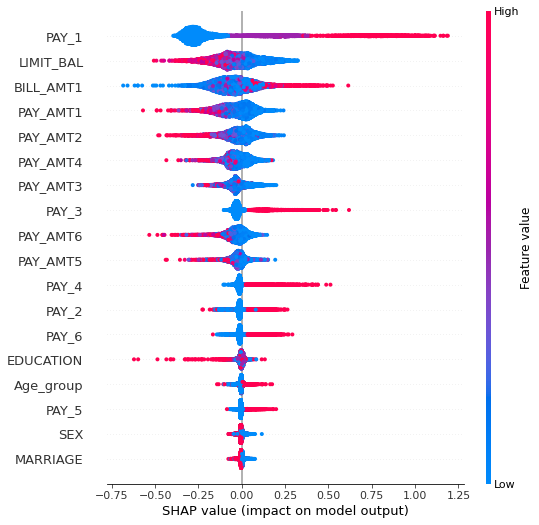

Number of Seconds for training the SHAP summary_plot 1.6532583236694336


In [71]:
start = time.time()
shap.summary_plot(shap_values, X_test)
end = time.time()
print("Number of Seconds for training the SHAP summary_plot",end - start)

## Dependence Plot


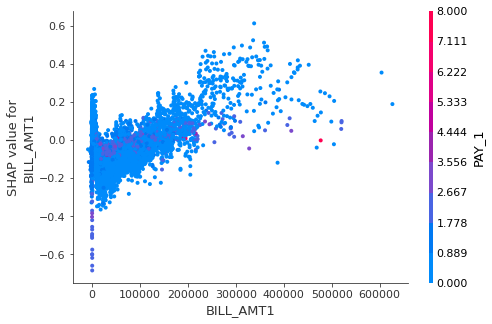

In [72]:
shap.dependence_plot('BILL_AMT1', shap_values, X_test)

# Experiment with Induced Feature Changes



## Local Monitoring : Interpreting Feature Drift For Observations

> This customer is 2 months behind in payment cycle and has $71876 outstanding.

In [198]:
index = list(y_test).index(1)
pd.DataFrame(X_test.iloc[index,:]).transpose()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Age_group
7330,240000.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,71876.0,3100.0,2400.0,2367.0,2435.0,2500.0,3000.0,0.0


> Let's look at the SHAP explaination for this customer. The PAY_1 variable has the biggest contribution, prediciton indicates that that customer is highly likely to default

In [199]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test.iloc[index,:])

> After swapping variable PAY_1 and PAY_6 we recalculate the SHAP values.

In [ ]:
#swapping PAY_1 and PAY_6 for the same customer

X_test.loc[7330,'PAY_1'] = X_test.loc[7330,'PAY_6']
shap_values = explainer.shap_values(X_test)


> Let's look at the SHAP values again.  PAY_1 is still the biggest contributior, but in the **OPPOSITE** direction. This difference should be investigated further to examine the possibilities of feature drift.

In [201]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test.iloc[index,:])

## Global Monitoring: Tracking Feature Drift For Dataset Over Iterations
> We ran the model for 100 iterations, bootstrapping 50 samples from test data for every iteration

> **PAY_1 is completely swapped with PAY_6 values from the 30th iteration**


> **We keep track of the standard model measures(AUC & Precision) and SHAP Loss of PAY_1**



In [202]:
%%time
temp = pd.concat([X_test, y_test], axis = 1)
loss, loss1 = [], []
index = list(temp).index('PAY_1')
auc, precision = [],[]
 
for i in range(100):
    temp2 = temp.sample(50, replace = True)
    
    if i < 30:
        explain_loss = shap.TreeExplainer(loaded_model, 
                                          temp2)
        
        auc.append(roc_auc_score(temp2['Default_Target'],
                                 loaded_model.predict(temp2.drop('Default_Target', axis = 1))))
        
        precision.append(precision_score( temp2['Default_Target'], 
                                 loaded_model.predict(temp2.drop('Default_Target', axis = 1))))
        
        prob_loss = explain_loss.shap_values(temp2)
        
        loss.append(prob_loss[:,index])
        
    else:
        # The SWAP is here after 30th iterations
        PAY_1, PAY_6 = temp2['PAY_1'], temp2['PAY_6']
        LIMIT_BAL, PAY_AMT5 = temp2['LIMIT_BAL'], temp2['PAY_AMT5']
        
        temp2['PAY_1'] = PAY_6
        temp2['PAY_6'] = PAY_1
        
        explain_loss = shap.TreeExplainer(loaded_model, temp2)
        
        auc.append(roc_auc_score(temp2['Default_Target'],
                                 loaded_model.predict_proba(temp2.drop('Default_Target', axis = 1))[:,1]))
        
        precision.append(precision_score(temp2['Default_Target'], 
                                 loaded_model.predict(temp2.drop('Default_Target', axis = 1))))

        
        prob_loss = explain_loss.shap_values(temp2)
                
        loss.append(prob_loss[:,index])
        

CPU times: user 43.3 s, sys: 23 ms, total: 43.4 s
Wall time: 41.3 s


### AUC - shows no difference even after the induced feature change from 30th iteration

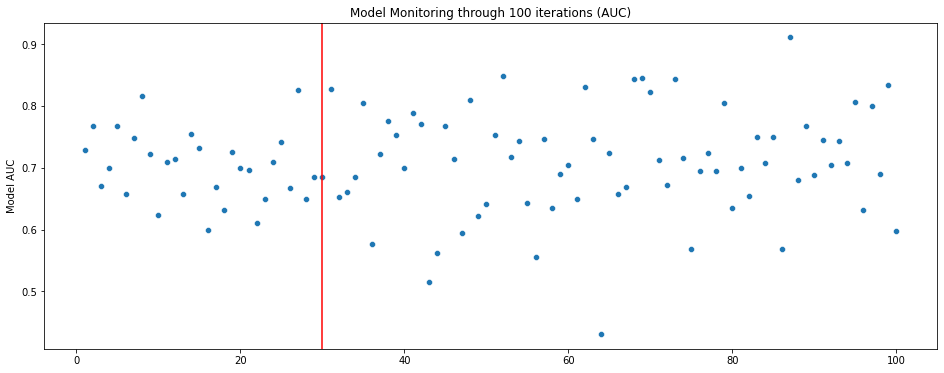

In [203]:
plt.figure(figsize=(16,6))
plt.title('Model Monitoring through 100 iterations (AUC)')
plt.ylabel('Model AUC')
sns.scatterplot(x=range(1, 101),y = auc)
plt.axvline(x=30, color = 'r')
plt.show()

### Precision - shows no difference even after the induced feature change from 30th iteration

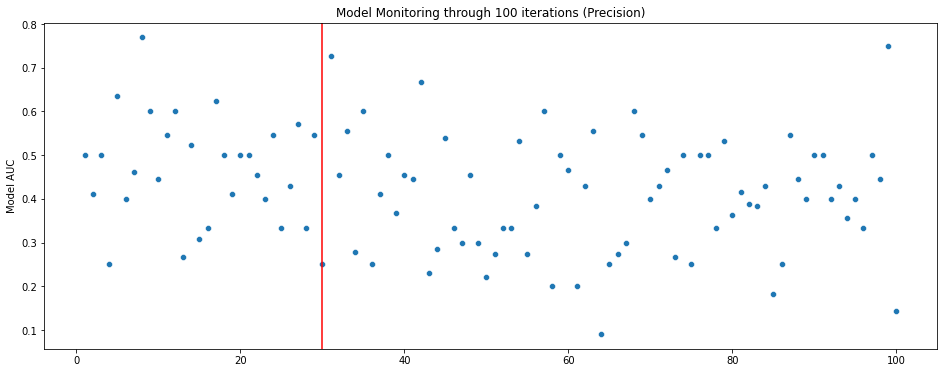

In [204]:
plt.figure(figsize=(16,6))
plt.title('Model Monitoring through 100 iterations (Precision)')
plt.ylabel('Model AUC')
sns.scatterplot(x=range(1, 101), y = precision)
plt.axvline(x=30, color = 'r')
plt.show()

### SHAP Loss for PAY_1 : Clearly indicates change in data from the 30th iteration

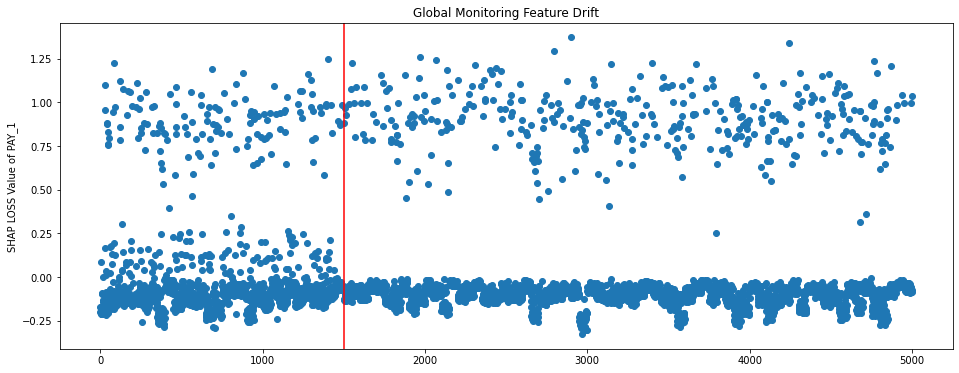

In [205]:
np_loss = np.asarray(loss)
np_loss = np_loss.ravel()

plt.figure(figsize=(16,6))
plt.title('Global Monitoring Feature Drift')
plt.ylabel('SHAP LOSS Value of PAY_1')
plt.scatter(range(1, 5001),np_loss)
plt.axvline(x=1500, color = 'r')
plt.show()